### BaseLearner12 - New Training Set

In [2]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')
train_new_path = Path('../../../other-chess-data/regulation-pieces-3/crops/')


test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [14]:
my_params = {'_train_seed':0, 
             '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_new_path,
            '_learn_norm': True,  # this was changed
            '_test_path':test_path_easy,
            }
default_params.update(my_params)

In [15]:
set_seed(42)
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True)

##### INITIAL FIT

In [16]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,3.971534,2.376398,0.241379,0.586207,0.344828,00:01
1,3.400485,1.235179,0.586207,0.844828,0.689655,00:01
2,2.926419,0.850984,0.741379,0.948276,0.810345,00:01
3,2.553993,0.634953,0.793103,0.982759,0.827586,00:01
4,2.323461,0.584875,0.810345,0.965517,0.862069,00:01
5,2.178387,0.494471,0.827586,1.000000,0.844828,00:01
6,2.046394,0.488374,0.810345,0.982759,0.844828,00:01
7,1.925213,0.491423,0.810345,1.000000,0.844828,00:01
8,1.777965,0.511448,0.827586,1.000000,0.844828,00:01
9,1.693616,0.506999,0.827586,1.000000,0.862069,00:01


In [18]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,2.565076,0.203704,0.543210,0.456790
1,1.840510,0.395062,0.716049,0.617284
2,1.217858,0.604938,0.827160,0.759259
3,1.071692,0.648148,0.876543,0.777778
4,0.990764,0.648148,0.919753,0.746914
5,0.992734,0.679012,0.938272,0.783951
6,0.923601,0.685185,0.938272,0.783951
7,0.839250,0.722222,0.944444,0.820988
8,0.811708,0.722222,0.944444,0.808642
9,0.802464,0.728395,0.938272,0.820988


In [19]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,1.279372,0.425489,0.827586,1.000000,0.844828,00:01


epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,1.315228,0.339536,0.879310,0.982759,0.896552,00:02
1,1.202146,0.319593,0.862069,1.000000,0.896552,00:02
2,1.171049,0.344643,0.827586,0.982759,0.862069,00:02
3,1.094885,0.278780,0.862069,1.000000,0.896552,00:02
4,1.070204,0.427374,0.879310,0.982759,0.896552,00:02
5,1.045777,0.254551,0.862069,1.000000,0.879310,00:02
6,0.987265,0.254258,0.862069,1.000000,0.879310,00:02
7,0.944643,0.506051,0.844828,1.000000,0.862069,00:02
8,0.923676,0.452819,0.844828,0.982759,0.879310,00:02
9,0.912933,0.256659,0.896552,1.000000,0.931035,00:02


In [20]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,2.565076,0.203704,0.543210,0.456790
1,1.840510,0.395062,0.716049,0.617284
2,1.217858,0.604938,0.827160,0.759259
3,1.071692,0.648148,0.876543,0.777778
4,0.990764,0.648148,0.919753,0.746914
5,0.992734,0.679012,0.938272,0.783951
6,0.923601,0.685185,0.938272,0.783951
7,0.839250,0.722222,0.944444,0.820988
8,0.811708,0.722222,0.944444,0.808642
9,0.802464,0.728395,0.938272,0.820988


### Evaluate

              precision    recall  f1-score   support

black-bishop       0.88      1.00      0.93        14
  black-king       0.82      0.82      0.82        11
black-knight       1.00      1.00      1.00        12
  black-pawn       1.00      1.00      1.00        16
 black-queen       0.92      0.92      0.92        13
  black-rook       0.86      1.00      0.92        12
white-bishop       1.00      0.83      0.91        12
  white-king       0.80      0.86      0.83        14
white-knight       0.88      0.93      0.90        15
  white-pawn       0.94      1.00      0.97        15
 white-queen       0.83      0.71      0.77        14
  white-rook       0.91      0.71      0.80        14

    accuracy                           0.90       162
   macro avg       0.90      0.90      0.90       162
weighted avg       0.90      0.90      0.90       162



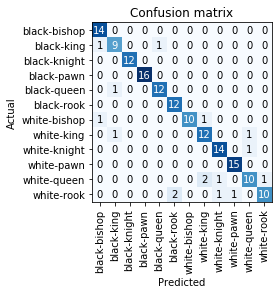

In [21]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

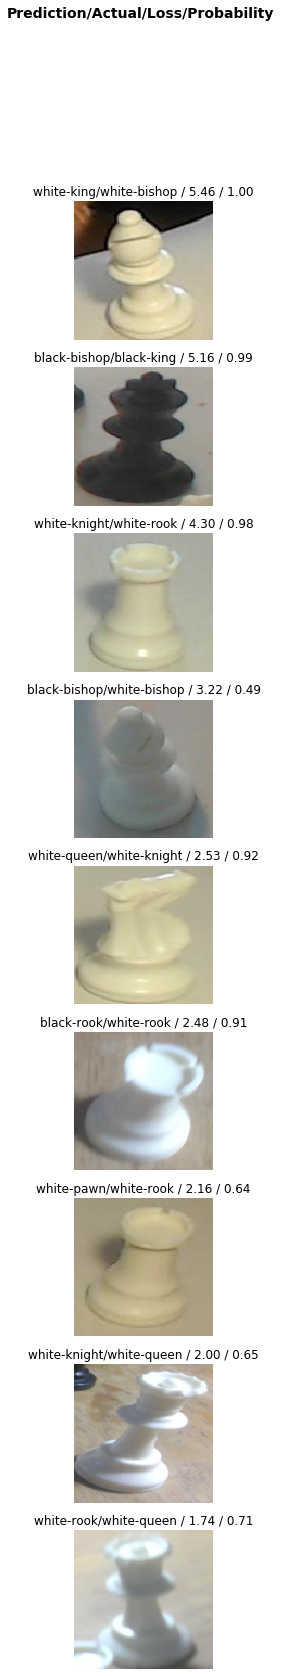

In [23]:
interp.plot_top_losses(9, nrows=9)

##### SAVE IT

In [6]:
learn.path = Path('../')
learn.save('base-learner-8')

In [7]:
!ls ../models/base-learner-8*

../models/base-learner-8.pth


##### NEW LOADED MODEL

In [8]:
set_seed(42)
train_dl_2, learn_2 = run_exp(default_params, 'dummy', b_ret=True)

In [9]:
learn_2.path = Path('../')

In [10]:
learn_2.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder]

In [11]:
learn_2.load('base-learner-8')

##### TEST FOR EQUIVALENCE

In [23]:
test_eq(
    learn_2.model.state_dict().values(),
    learn.model.state_dict().values()
)

test_eq(
    learn_2.model.state_dict().keys(),
    learn.model.state_dict().keys()
)

In [28]:
test_eq( learn.opt.state_dict().keys(),
        learn_2.opt.state_dict().keys()
       )
# test_eq( learn.opt.state_dict().values(),
#          learn_2.opt.state_dict().values()
#        )

In [31]:
len(learn.opt.state_dict()['state'])

165

In [32]:
len(learn_2.opt.state_dict()['state'])

165

##### DIFFERENT RUNS

In [12]:
set_seed(20)
with learn.no_logging(): learn.fine_tune(20)

In [13]:
pd.DataFrame(learn.cbs[3].values).iloc[-2:,:]

,0,1,2,3
29,0.478619,0.855263,0.973684,0.881579
30,0.435804,0.868421,0.978070,0.894737


In [14]:
set_seed(20)
with learn_2.no_logging(): learn_2.fine_tune(20)

In [15]:
pd.DataFrame(learn_2.cbs[3].values).iloc[-2:,:]

,0,1,2,3
19,0.493076,0.824561,0.978070,0.850877
20,0.439624,0.842105,0.982456,0.872807


So, clearly they don't work the exact same way